In [26]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import warnings
warnings.filterwarnings('ignore')

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


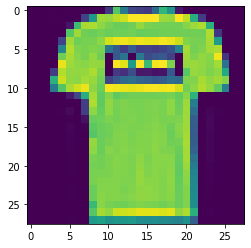

In [6]:
plt.imshow(X_train[1])

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
X_train, X_test = X_train/255, X_test/255

In [11]:
X_train.max()

1.0

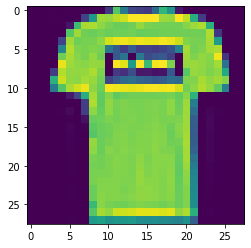

In [12]:
plt.imshow(X_train[1])

In [13]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [22]:
model = Sequential()
#Convolution layers
model.add(Conv2D(filters=32, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same", strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

#Dense layers
model.add(Dense(256, activation='relu',))
model.add(Dropout(0.3))

#output layer
model.add(Dense(10, activation='softmax'))

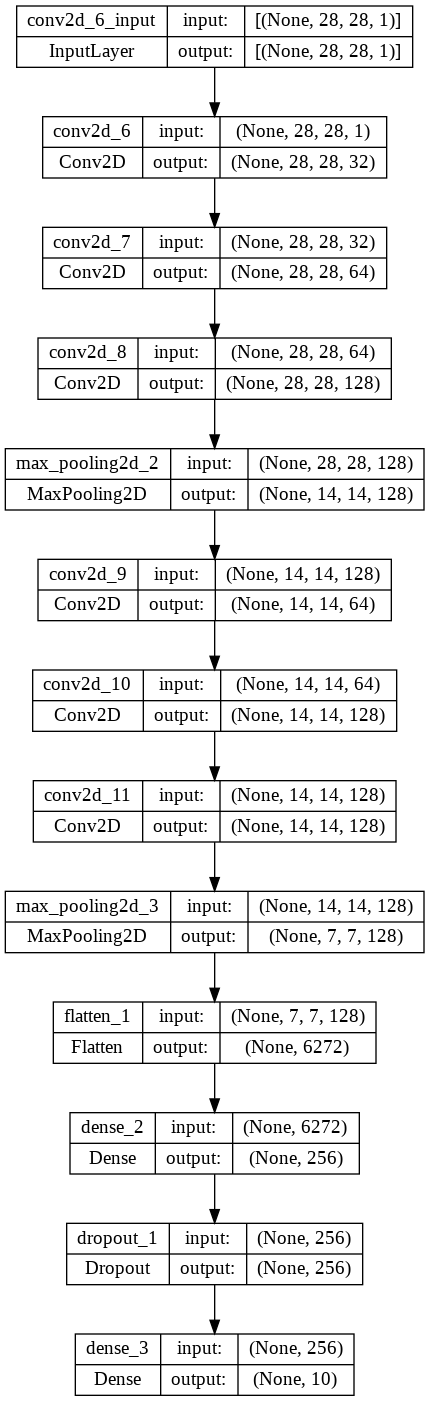

In [27]:
keras.utils.plot_model(model, show_shapes=True)

In [23]:
early_stop = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),  ModelCheckpoint('save_at_{epoch}.h5')]

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )

In [25]:
model.fit(X_train, y_train, epochs=100, callbacks=[early_stop], validation_data=(X_test, y_test), batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 695s 370ms/step - loss: 0.4035 - accuracy: 0.8521 - val_loss: 0.2854 - val_accuracy: 0.8957
Epoch 2/100
1875/1875 [==============================] - 694s 370ms/step - loss: 0.2603 - accuracy: 0.9048 - val_loss: 0.2364 - val_accuracy: 0.9115
Epoch 3/100
1875/1875 [==============================] - 694s 370ms/step - loss: 0.2160 - accuracy: 0.9209 - val_loss: 0.2229 - val_accuracy: 0.9205
Epoch 4/100
1875/1875 [==============================] - 692s 369ms/step - loss: 0.1850 - accuracy: 0.9311 - val_loss: 0.2066 - val_accuracy: 0.9272
Epoch 5/100
1875/1875 [==============================] - 696s 371ms/step - loss: 0.1615 - accuracy: 0.9406 - val_loss: 0.2149 - val_accuracy: 0.9259
Epoch 6/100
1875/1875 [==============================] - 699s 373ms/step - loss: 0.1397 - accuracy: 0.9483 - val_loss: 0.2231 - val_accuracy: 0.9231
Epoch 7/100
1875/1875 [==============================] - 703s 375ms/step - loss: 0.1215 - accuracy: 0.9545

In [30]:
loss = pd.DataFrame(model.history.history)

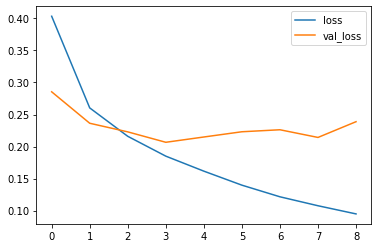

In [31]:
loss[['loss', 'val_loss']].plot()

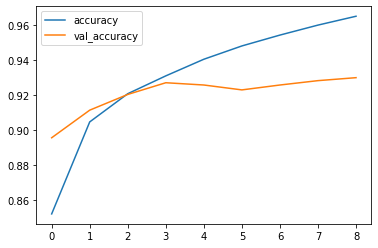

In [32]:
loss[['accuracy', 'val_accuracy']].plot()

In [33]:
pred = model.predict(X_test)

313/313 [==============================] - 28s 89ms/step


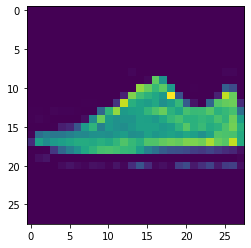

In [34]:
plt.imshow(X_test[102].reshape(28, 28))

In [37]:
np.argmax(pred[102])

7

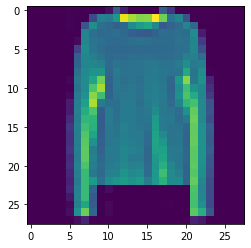

In [38]:
plt.imshow(X_test[202].reshape(28, 28))

In [40]:
np.argmax(pred[202])

2

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [42]:
preds = np.argmax(pred, axis=1)

In [43]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.90      0.92      0.91      1000
           3       0.91      0.94      0.92      1000
           4       0.88      0.91      0.90      1000
           5       0.99      0.98      0.98      1000
           6       0.82      0.76      0.79      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



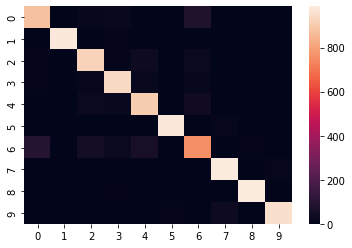

In [44]:
sns.heatmap(confusion_matrix(y_test, preds))

In [45]:
confusion_matrix(y_test, preds)

array([[877,   0,  16,  23,   2,   1,  78,   0,   3,   0],
       [  2, 982,   0,  11,   1,   0,   2,   0,   2,   0],
       [  9,   0, 924,   8,  34,   0,  25,   0,   0,   0],
       [ 10,   0,  12, 938,  23,   0,  16,   1,   0,   0],
       [  2,   0,  25,  22, 909,   0,  42,   0,   0,   0],
       [  0,   0,   0,   0,   0, 983,   0,  14,   0,   3],
       [ 96,   0,  49,  26,  59,   0, 759,   0,  11,   0],
       [  0,   0,   0,   0,   0,   3,   0, 985,   0,  12],
       [  1,   0,   1,   5,   2,   0,   1,   3, 987,   0],
       [  0,   0,   0,   0,   0,   9,   0,  34,   0, 957]])